In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Xem qua dữ liệu để tìm phương hướng xử lý

In [ ]:
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI Project/train.csv')
train_df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


# Vẽ biểu đồ tần số của các thuộc tính dạng số

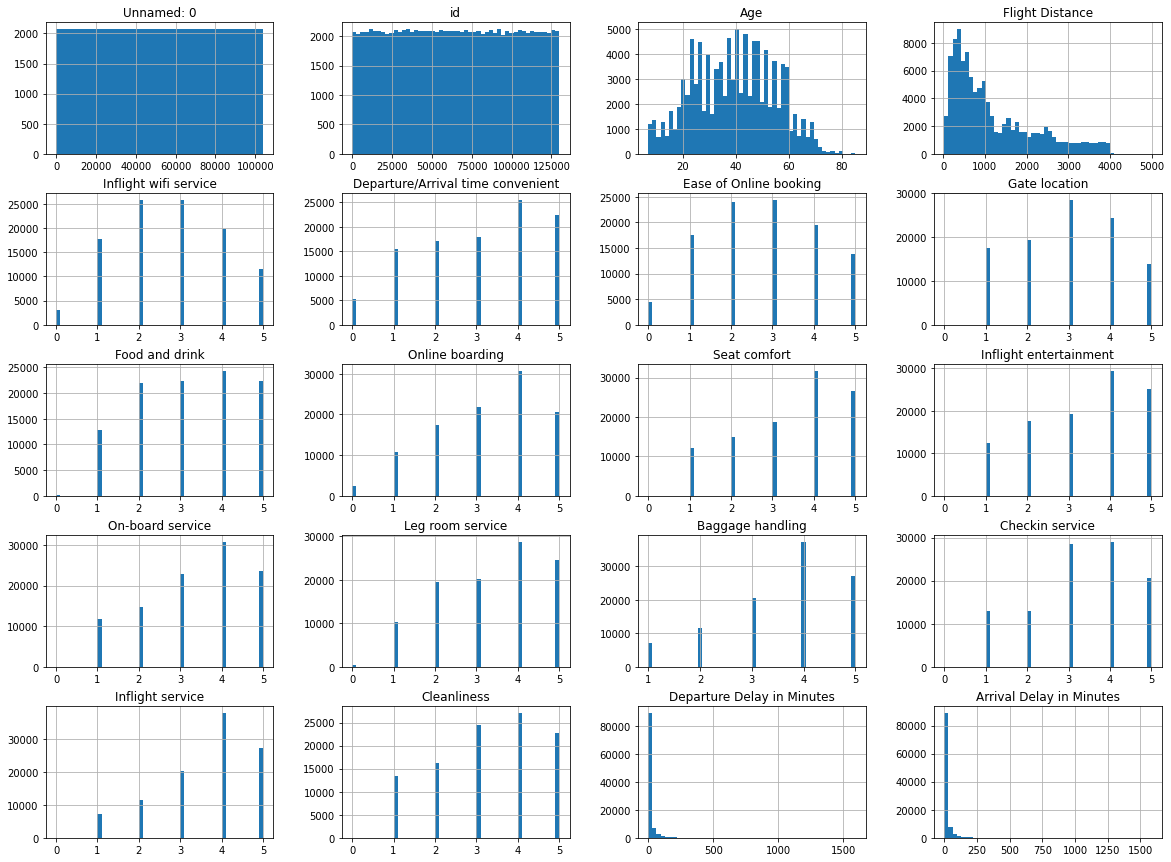

In [ ]:
train_df.hist(bins=50, figsize=(20, 15))
plt.show()

# Tiếp tục làm tương tự trên tập test để xét yếu tố cân bằng giữa 2 tập train-test

In [ ]:
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI Project/test.csv')
test_df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


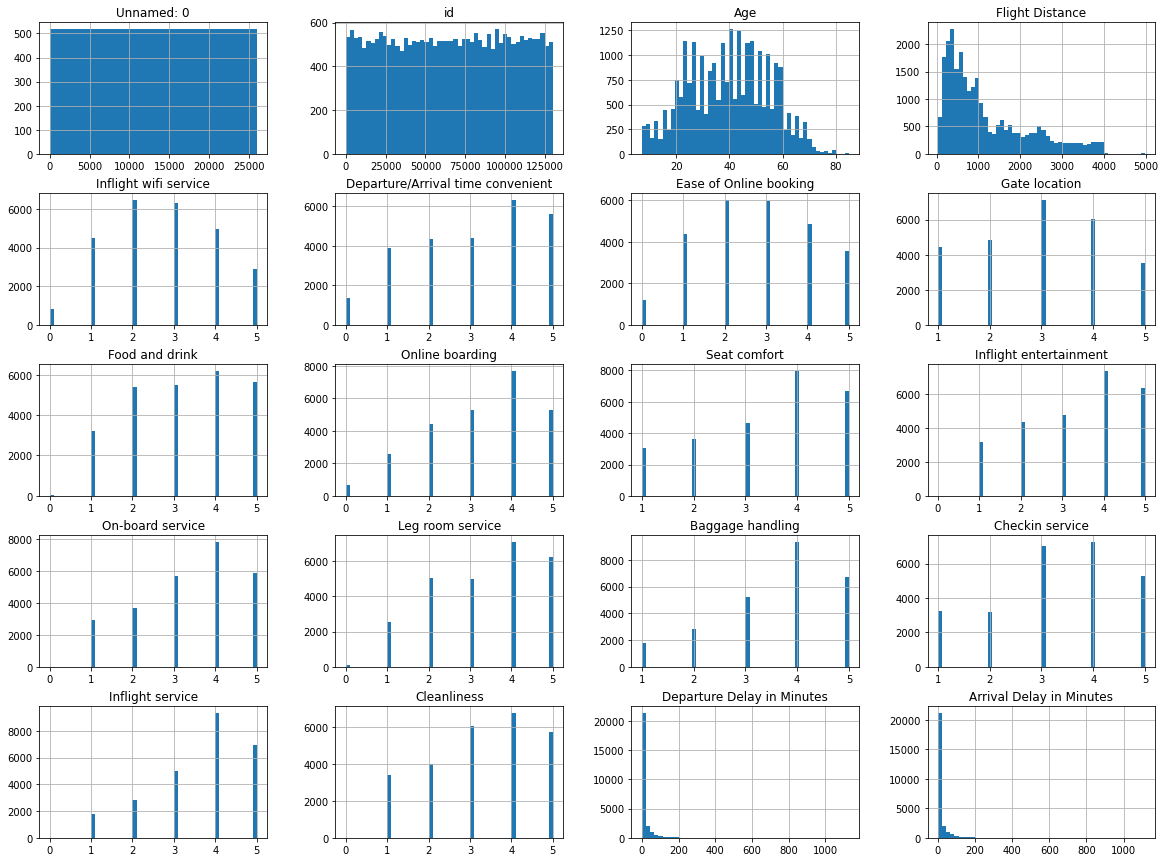

In [ ]:
test_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
test_df.shape

(25976, 25)

# Xét yếu tố tương quan của các thuộc tính so với nhau

In [ ]:
train_corr = train_df.corr()
train_corr

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.002991,0.004786,0.002794,-0.002490,0.000739,0.001913,0.005073,-0.002162,0.001002,0.000044,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,-0.000045
id,0.002991,1.000000,0.022857,0.095544,-0.021276,-0.002110,0.014163,-0.000606,0.001063,0.055477,0.052903,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.037254
Age,0.004786,0.022857,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.002794,0.095544,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,-0.002490,-0.021276,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,0.000739,-0.002110,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.001913,0.014163,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,0.005073,-0.000606,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,-0.002162,0.001063,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.001002,0.055477,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949


In [ ]:
test_corr = test_df.corr()
test_corr

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.006946,-0.007964,-0.002470,-0.003085,-0.003962,-0.002011,-0.001360,-0.010858,-0.000254,-0.005602,-0.012927,0.001180,-0.004194,0.000349,0.002773,-0.008069,-0.005058,-0.005948,-0.002974
id,0.006946,1.000000,0.010211,0.095335,-0.030303,-0.002502,0.010389,0.001843,-0.006789,0.055767,0.049212,-0.001078,0.056544,0.041921,0.073085,0.079521,0.076587,0.020411,-0.009884,-0.029090
Age,-0.007964,0.010211,1.000000,0.099409,0.009242,0.032449,0.013565,0.003308,0.023841,0.202058,0.154507,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004334,-0.007400
Flight Distance,-0.002470,0.095335,0.099409,1.000000,0.005007,-0.014401,0.062989,0.008410,0.057322,0.214629,0.158957,0.137538,0.117880,0.136995,0.071549,0.075720,0.066355,0.105578,0.003446,0.000131
Inflight wifi service,-0.003085,-0.030303,0.009242,0.005007,1.000000,0.349137,0.710684,0.347790,0.122306,0.459366,0.116991,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.010078,-0.012277
Departure/Arrival time convenient,-0.003962,-0.002502,0.032449,-0.014401,0.349137,1.000000,0.440230,0.458439,-0.016006,0.080937,-0.001926,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000238,-0.001345
Ease of Online booking,-0.002011,0.010389,0.013565,0.062989,0.710684,0.440230,1.000000,0.465514,0.025141,0.408003,0.022811,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.001062,-0.003161
Gate location,-0.001360,0.001843,0.003308,0.008410,0.347790,0.458439,0.465514,1.000000,-0.009694,0.006993,-0.000721,-0.000340,-0.031606,-0.002428,-0.004395,-0.054954,-0.005129,-0.014195,0.008039,0.007776
Food and drink,-0.010858,-0.006789,0.023841,0.057322,0.122306,-0.016006,0.025141,-0.009694,1.000000,0.229601,0.580970,0.627265,0.050688,0.035870,0.037617,0.076775,0.039992,0.659253,-0.025957,-0.028309
Online boarding,-0.000254,0.055767,0.202058,0.214629,0.459366,0.080937,0.408003,0.006993,0.229601,1.000000,0.415414,0.279391,0.149430,0.120354,0.084583,0.203309,0.071972,0.320912,-0.021037,-0.025875




---

